In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
data = pd.read_csv("Mall_Customers.csv")
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
value_counts = data['Genre'].value_counts()
print(value_counts)

Genre
0    112
1     88
Name: count, dtype: int64


In [89]:
data.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [94]:
data.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

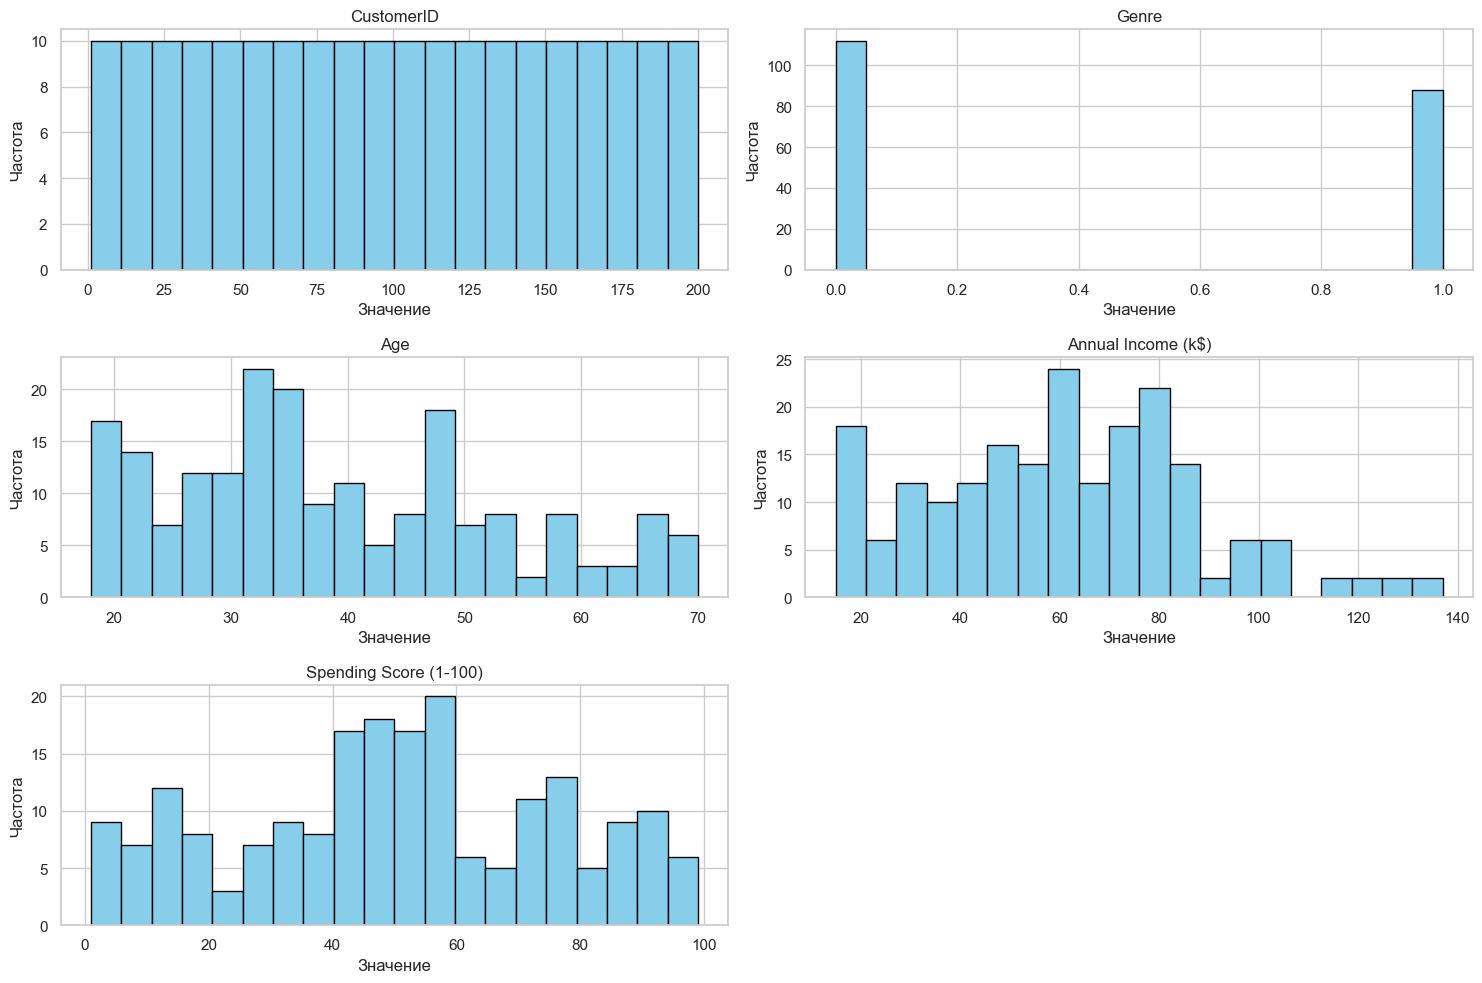

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('wine_class', 'Класс вина'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


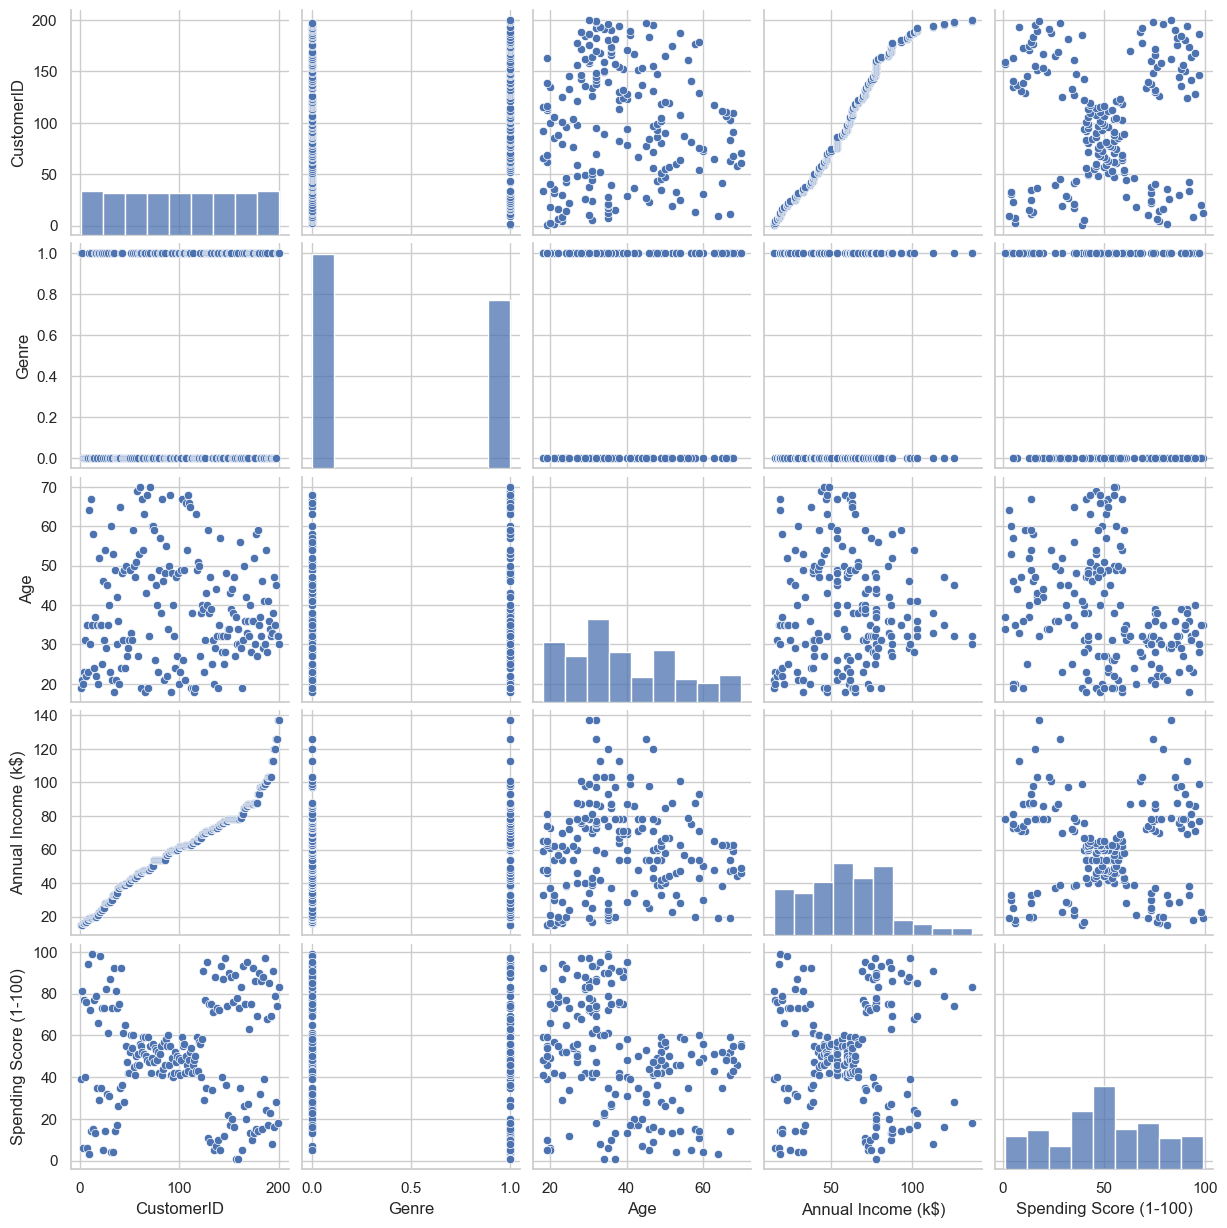

In [101]:
# Парные диаграммы рассеяния
sns.pairplot(data)
plt.show()

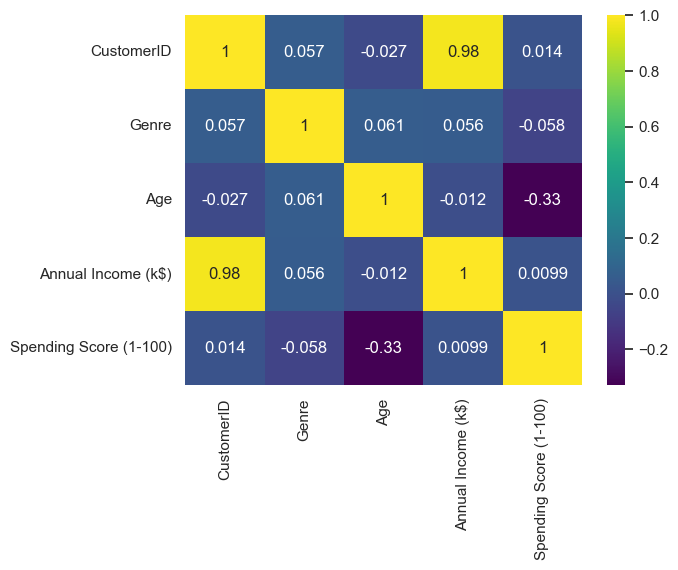

In [102]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

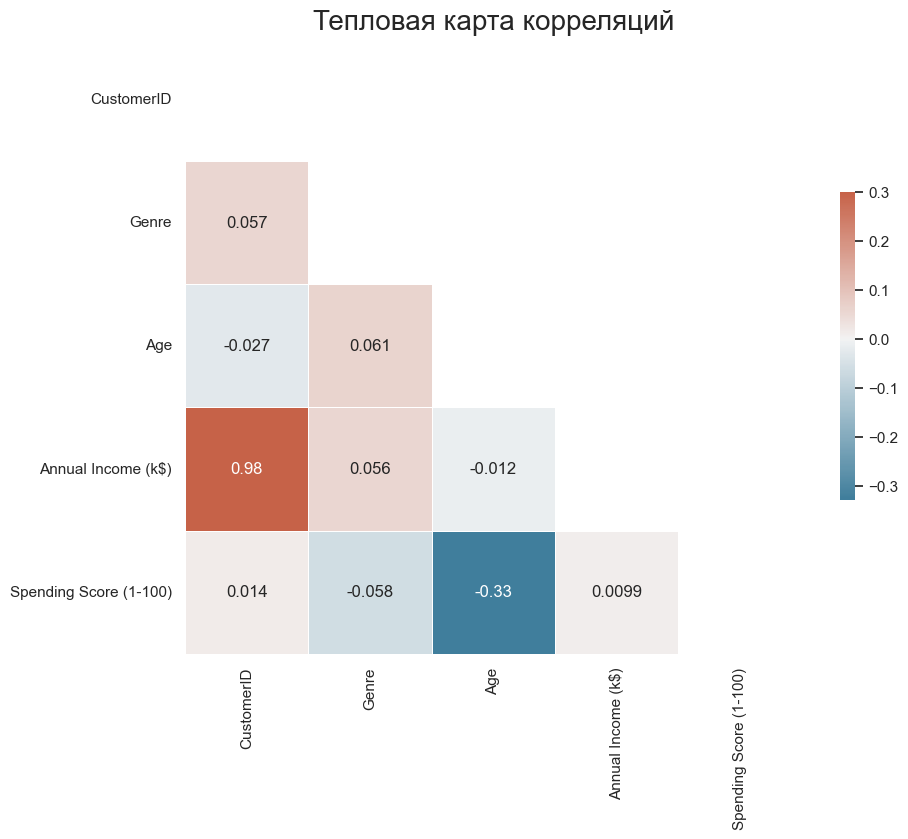

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn
sns.set(style="white")

# Расчет корреляционной матрицы
corr = data.corr()

# Маска для отображения только нижней треугольной части матрицы (опционально)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Добавление заголовка
plt.title('Тепловая карта корреляций', fontsize=20)

# Показать график
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = data.iloc[:, :-1]
y = data['Genre']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)